In [1]:
%matplotlib notebook

In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import openweatherapp_API_key
import time
from datetime import datetime
import os
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, 1500)
lngs = np.random.uniform(-180, 180, 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coords = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

619

In [5]:
# Starting URL for Weather Map API Call
url='http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+openweatherapp_API_key

In [7]:
# Initialize counters and an empty list that will hold the weather data
city_data = []
print('Beginning Data Retrieval')
print('-----------------------------')
record_count = 1
set_count = 1
# Loop through the cities list
for i, city in enumerate(cities):
    # Group the cities in sets of 50 to log the process
    if (i%50==0 and i>=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Build the city_url for each city
    city_url = url+'&q='+city.replace(' ','+')
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count
    record_count += 1
    # Make an API request for each city
    try:
        # Parse the JSON weather data
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({'City':city.title(),
                           'Lat':city_lat,
                           'Lng':city_lng,
                           'Max Temp':city_temp_max,
                           'Humidity':city_humidity,
                           'Cloudiness':city_clouds,
                           'Wind Speed':city_wind,
                           'Country':city_country,
                           'Date':city_date})
    except KeyError:
        print('City not found. Skipping...')
        pass
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | saint-francois
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | solsvik
City not found. Skipping...
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | tornio
Processing Record 11 of Set 1 | calama
Processing Record 12 of Set 1 | linxia
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | mogadishu
Processing Record 15 of Set 1 | fairbanks
Processing Record 16 of Set 1 | dutlwe
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | majholi
Processing Record 20 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing Reco

Processing Record 36 of Set 4 | sinnamary
Processing Record 37 of Set 4 | sisimiut
Processing Record 38 of Set 4 | batemans bay
Processing Record 39 of Set 4 | taoudenni
Processing Record 40 of Set 4 | camacha
Processing Record 41 of Set 4 | apatity
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | kirksville
Processing Record 44 of Set 4 | izmaylovo
Processing Record 45 of Set 4 | campoverde
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | dalvik
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | srandakan
Processing Record 50 of Set 4 | bluff
Processing Record 1 of Set 5 | kaseda
Processing Record 2 of Set 5 | idil
Processing Record 3 of Set 5 | vaitape
Processing Record 4 of Set 5 | ketchikan
Processing Record 5 of Set 5 | kolda
Processing Record 6 of Set 5 | halalo
City not found. Skipping...
Processing Record 7 of Set 5 | turukhansk
Processing Record 8 of Set 5 | kamenka
Processing Record 9 of Set 5 | ocos
P

Processing Record 26 of Set 8 | kalianget
Processing Record 27 of Set 8 | torrington
Processing Record 28 of Set 8 | siauliai
Processing Record 29 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 8 | koundara
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | kasongo-lunda
Processing Record 33 of Set 8 | cap malheureux
Processing Record 34 of Set 8 | najran
Processing Record 35 of Set 8 | xadani
City not found. Skipping...
Processing Record 36 of Set 8 | andros town
Processing Record 37 of Set 8 | iskateley
Processing Record 38 of Set 8 | chaoyang
Processing Record 39 of Set 8 | qasigiannguit
Processing Record 40 of Set 8 | pasighat
Processing Record 41 of Set 8 | levittown
Processing Record 42 of Set 8 | yankton
Processing Record 43 of Set 8 | arman
Processing Record 44 of Set 8 | palmer
Processing Record 45 of Set 8 | santa maria
Processing Record 46 of Set 8 | matara
Processing Record 47 of Set 8 | illoqqortoormiut
City not found. S

Processing Record 11 of Set 12 | bachatskiy
Processing Record 12 of Set 12 | kendallville
Processing Record 13 of Set 12 | geraldton
Processing Record 14 of Set 12 | almas
Processing Record 15 of Set 12 | hambantota
Processing Record 16 of Set 12 | viedma
Processing Record 17 of Set 12 | krasnoselkup
Processing Record 18 of Set 12 | port augusta
Processing Record 19 of Set 12 | east moline
Processing Record 20 of Set 12 | aykhal
Processing Record 21 of Set 12 | jatai
Processing Record 22 of Set 12 | bathsheba
Processing Record 23 of Set 12 | bam
Processing Record 24 of Set 12 | glens falls
Processing Record 25 of Set 12 | harlingen
Processing Record 26 of Set 12 | neiafu
Processing Record 27 of Set 12 | aasiaat
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | mukhen
Processing Record 30 of Set 12 | mastic beach
Processing Record 31 of Set 12 | wilmington
Processing Record 32 of Set 12 | harboore
Processing Record 33 of Set 12 | wanaka
Processing Record 34 of S

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[city_data_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-03-10 11:19:10,-23.1203,-134.9692,77.95,71,77,7.81
1,Saint-Francois,FR,2022-03-10 11:19:34,46.4154,3.9054,56.48,61,0,3.44
2,Chokurdakh,RU,2022-03-10 11:12:28,70.6333,147.9167,-9.24,97,100,5.88
3,Butaritari,KI,2022-03-10 11:19:15,3.0707,172.7902,80.01,82,94,14.41
4,Hermanus,ZA,2022-03-10 11:19:35,-34.4187,19.2345,80.80,60,10,16.73


In [ ]:
# Export the City_Data into a CSV
output_data_file = os.path.join('Weather Data', 'cities.csv')
city_data_df.to_csv(output_data_file,index_label='City_ID')

In [3]:
# Run from here when reopening notebook so that you dont have to collect new weather data
output_data_file = os.path.join('Weather Data', 'cities.csv')
city_data_df = pd.read_csv(output_data_file,index_col='City_ID')
city_data_df.index.names = [None]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-03-10 11:19:10,-23.1203,-134.9692,77.95,71,77,7.81
1,Saint-Francois,FR,2022-03-10 11:19:34,46.4154,3.9054,56.48,61,0,3.44
2,Chokurdakh,RU,2022-03-10 11:12:28,70.6333,147.9167,-9.24,97,100,5.88
3,Butaritari,KI,2022-03-10 11:19:15,3.0707,172.7902,80.01,82,94,14.41
4,Hermanus,ZA,2022-03-10 11:19:35,-34.4187,19.2345,80.80,60,10,16.73


In [4]:
# Extract relevant fields from the DataFrame for plotting
lats_s = city_data_df['Lat']
max_temps_s = city_data_df['Max Temp']
humidity_s = city_data_df['Humidity']
cloudiness_s = city_data_df['Cloudiness']
wind_speed_s = city_data_df['Wind Speed']

<IPython.core.display.Javascript object>


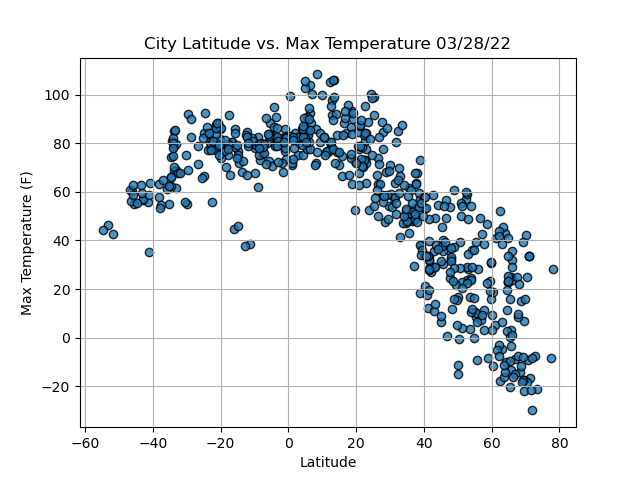

In [5]:
# Build the scatter plot for latitude vs. max temperature
fig1,ax = plt.subplots()
ax.scatter(lats_s, max_temps_s,
          edgecolor='k', linewidths=1, marker='o', alpha=.8, label='Cities')
# Incorporate the other graph properties
ax.set_title(f'City Latitude vs. Max Temperature '+time.strftime('%x'))
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.grid()
# Save the figure
Fig1 = os.path.join('Weather Data', 'Fig1.png')
fig1.savefig(Fig1)
# Show plot
fig1.show()

<IPython.core.display.Javascript object>


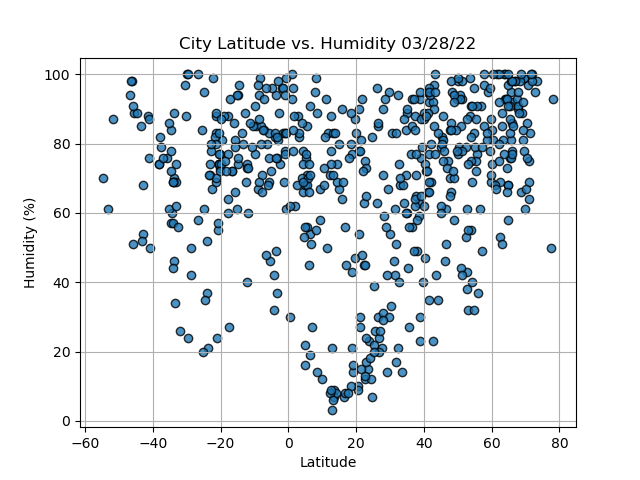

In [6]:
# Build the scatter plots for latitude vs. humidity
fig2,ax = plt.subplots()
ax.scatter(lats_s, humidity_s,
          edgecolor='k', linewidths=1, marker='o', alpha=.8, label='Cities')
# Incorporate the other graph properties
ax.set_title(f'City Latitude vs. Humidity '+time.strftime('%x'))
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid()
# Save the figure
Fig2 = os.path.join('Weather Data', 'Fig2.png')
fig2.savefig(Fig2)
# Show plot
fig2.show()

<IPython.core.display.Javascript object>


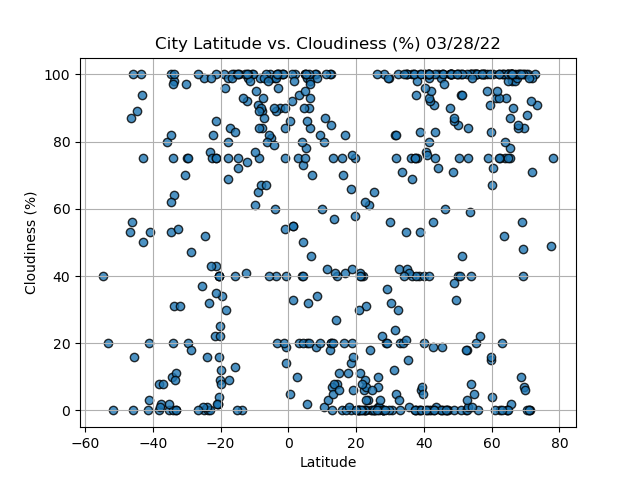

In [7]:
# Build the scatter plots for latitude vs. cloudiness
fig3,ax = plt.subplots()
ax.scatter(lats_s, cloudiness_s,
          edgecolor='k', linewidths=1, marker='o', alpha=.8, label='Cities')
# Incorporate the other graph properties
ax.set_title(f'City Latitude vs. Cloudiness (%) '+time.strftime('%x'))
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid()
# Save the figure
Fig3 = os.path.join('Weather Data', 'Fig3.png')
fig3.savefig(Fig3)
# Show plot
fig3.show()

<IPython.core.display.Javascript object>


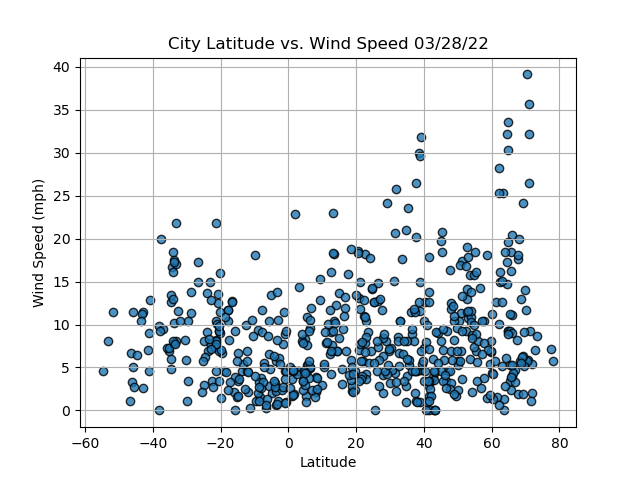

In [8]:
# Build the scatter plots for latitude vs. wind speed
fig4,ax = plt.subplots()
ax.scatter(lats_s, wind_speed_s,
          edgecolor='k', linewidths=1, marker='o', alpha=.8, label='Cities')
# Incorporate the other graph properties
ax.set_title(f'City Latitude vs. Wind Speed '+time.strftime('%x'))
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.grid()
# Save the figure
Fig4 = os.path.join('Weather Data', 'Fig4.png')
fig4.savefig(Fig4)
# Show plot
fig4.show()

In [9]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(fig_title, x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = 'y = '+str(round(slope,2))+'x + '+str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    fig_title,ax = plt.subplots()
    ax.scatter(x_values, y_values)
    ax.plot(x_values, regress_values, 'r')
    # Annotate the text for the line equation
    ax.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(y_label)
    fig_title.show()

In [10]:
index13 = city_data_df.loc[13]
index13

City                    Fairbanks
Country                        US
Date          2022-03-10 11:19:38
Lat                       64.8378
Lng                     -147.7164
Max Temp                    22.96
Humidity                       68
Cloudiness                    100
Wind Speed                   9.22
Name: 13, dtype: object

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

<IPython.core.display.Javascript object>


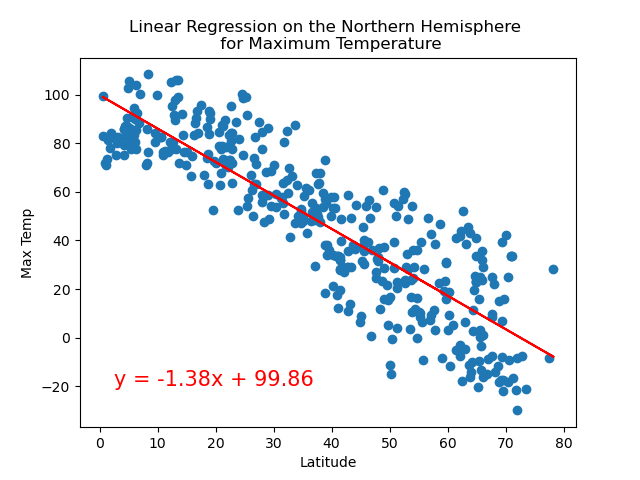

In [12]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression('fig5', x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (2.5,-20))

<IPython.core.display.Javascript object>


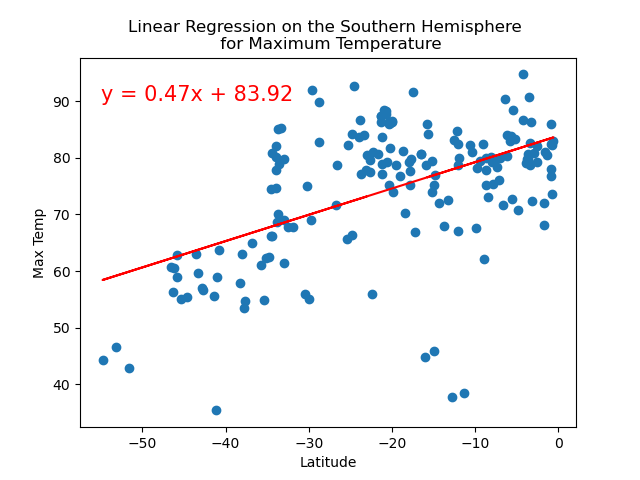

In [13]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression('fig6', x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-55,90))

<IPython.core.display.Javascript object>


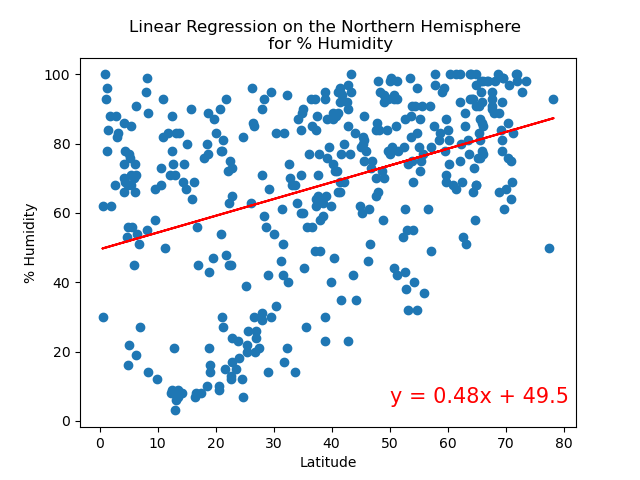

In [14]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression('fig7', x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (50,5))

<IPython.core.display.Javascript object>


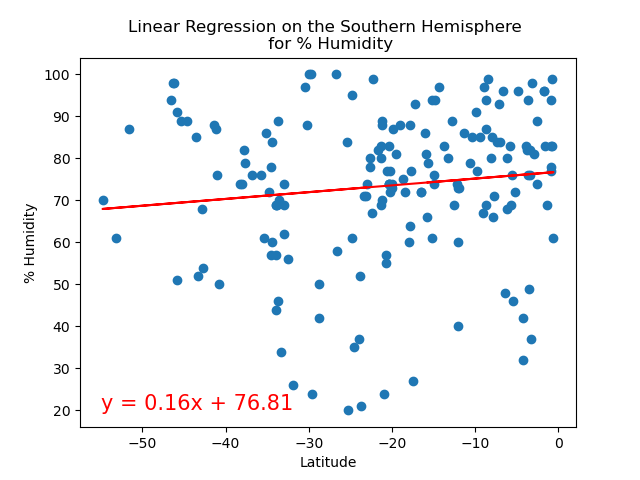

In [15]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression('fig8', x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55,20))

<IPython.core.display.Javascript object>


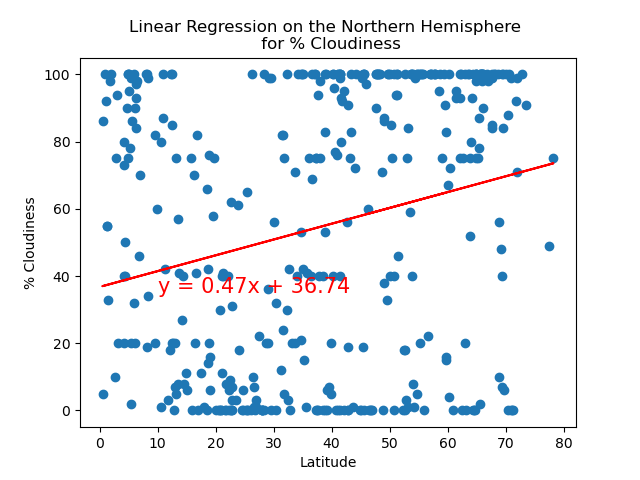

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression('fig9', x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,35))

<IPython.core.display.Javascript object>


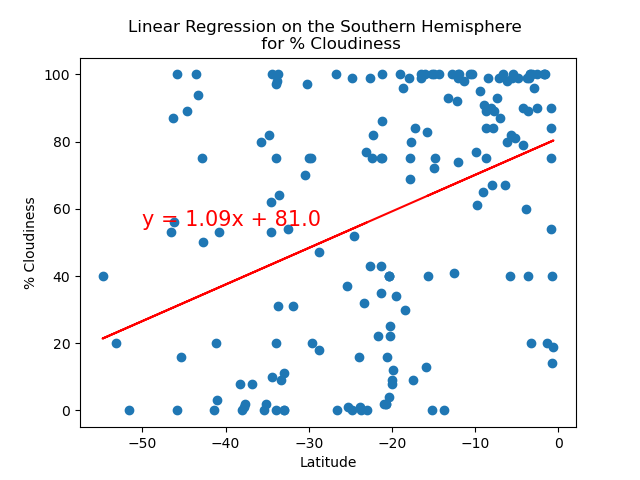

In [17]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression('fig10', x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,55))

<IPython.core.display.Javascript object>


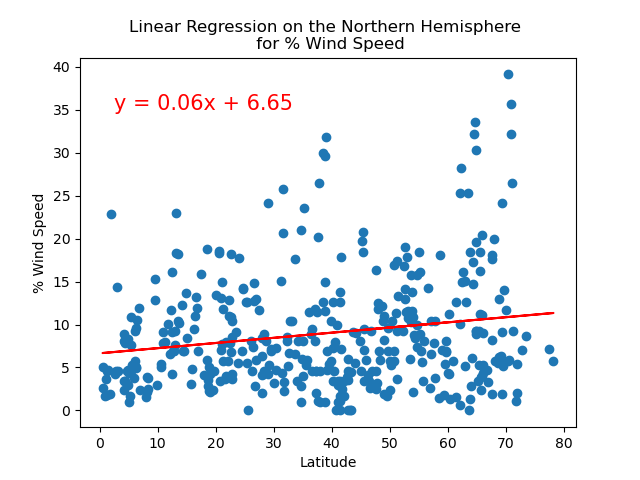

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression('fig11', x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Wind Speed', '% Wind Speed', (2.5,35))

<IPython.core.display.Javascript object>


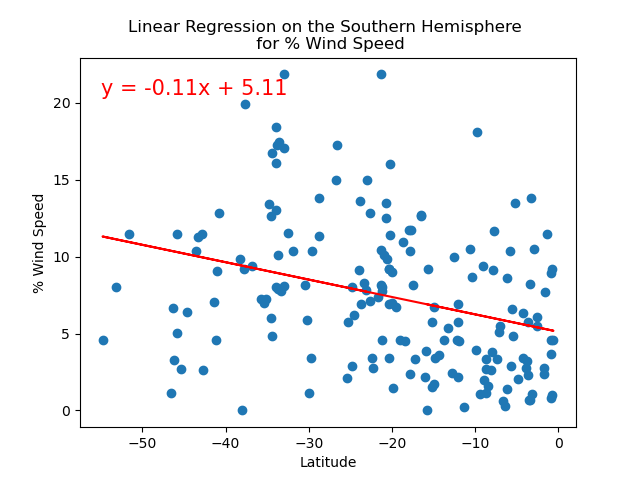

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression('fig12', x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Wind Speed', '% Wind Speed', (-55,20.5))